<a href="https://colab.research.google.com/github/arthur422tp/arthur422/blob/master/%E3%80%8C%E3%80%8C%E5%B0%88%E6%A1%88_ipynb%E3%80%8D(%E6%9C%AC%E7%89%A9)%E3%80%8D%E7%84%A1%E4%B8%BB%E9%A1%8C%E6%97%A5%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import bs4
import pandas as pd
from sklearn import linear_model
import numpy as np
import sklearn.preprocessing
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_1 = pd.read_excel('/content/drive/MyDrive/桃園樂天.xlsx')
data_2 = pd.read_excel('/content/drive/MyDrive/桃園樂天.xlsx',sheet_name= '工作表2')
data_combine = pd.read_excel('/content/drive/MyDrive/桃園樂天.xlsx',sheet_name= '工作表4')


In [ ]:
df_frame_1 = pd.DataFrame(data_1)
df_frame_2 = pd.DataFrame(data_2)
df_frame_data = pd.DataFrame(data_combine)

In [ ]:
df_frame_data

,場次,日期,星期,球場,客隊(全壘打)(失誤),主隊(全壘打)(失誤),觀眾人數,襄,苡,妲,叡,女孩,滿場率,主題日,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,16,2021-03-23,(二),桃園,味全龍(1)(0),樂天桃猿(0)(1),7884,1,1,0,0,3/23 曲 倪 鹿 卉 苡 籃 孟 菲 筠 伊襄紫霓...,0.39420,1,NaN,NaN,NaN
1,20,2021-03-25,(四),桃園,統一7-ELEVEn獅(0)(3),樂天桃猿(0)(1),3992,0,0,1,1,3/25 慧倪 鹿妲 舞 璐籃 凱孟 潼叡 筠宣 ...,0.19960,1,NaN,NaN,NaN
2,27,2021-03-30,(二),桃園,味全龍(0)(0),樂天桃猿(0)(0),3694,0,0,1,0,3/30 沐 倪 鹿妲 芯舞卉 璐 孟 潼 筠 伊 紫 ...,0.18470,1,NaN,NaN,NaN
3,29,2021-03-31,(三),桃園,味全龍(1)(3),樂天桃猿(0)(1),3631,0,0,0,1,3/31 慧 鹿 芯舞卉 凱 潼叡菲 筠宣 伊 紫 ...,0.18155,1,NaN,NaN,NaN
4,31,2021-04-01,(四),桃園,統一7-ELEVEn獅(0)(0),樂天桃猿(0)(2),6156,0,1,1,0,4/1 沐曲慧倪 鹿妲 芯舞 苡 凱孟 菲 筠 ...,0.30780,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,298,2022-10-14,(五),桃園,味全龍(0)(3),樂天桃猿(0)(0),6894,0,0,0,1,10/14 慧倪 縈 舞 潼叡菲 筠 伊 樂 ...,0.34470,0,NaN,NaN,NaN
104,222,2022-10-20,(四),桃園,統一7-ELEVEn獅(0)(0),樂天桃猿(1)(0),4842,1,0,0,0,10/20曲慧倪 舞 菲 筠 伊襄紫霓樂 ...,0.24210,0,NaN,NaN,NaN
105,153,2022-10-22,(六),桃園,味全龍(0)(1),樂天桃猿(0)(1),10551,0,1,0,1,10/22曲慧倪 縈 舞 苡 凱孟 潼叡菲 筠 紫 樂 ...,0.52755,1,NaN,NaN,NaN
106,155,2022-10-23,(日),桃園,中信兄弟(2)(0),樂天桃猿(1)(0),10502,0,1,0,0,10/23曲慧倪 縈 芯舞卉 苡 凱 筠 伊 霓樂 ...,0.52510,0,NaN,NaN,NaN


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
interest_columns = ['襄', '苡', '妲', '叡']
X1 = df_frame_1[interest_columns]
X2 = df_frame_2[interest_columns]
X = df_frame_data[interest_columns]

In [ ]:
Y1 = df_frame_1[['觀眾人數']]
Y2 = df_frame_2[['觀眾人數']]
Y = df_frame_data[['觀眾人數']]

In [ ]:
Y1.describe()

,觀眾人數
count,48.000000
mean,4049.145833
std,2459.114371
min,1211.000000
25%,2223.250000
50%,3346.000000
75%,5548.750000
max,11513.000000


In [ ]:
Y2.describe()

,觀眾人數
count,60.000000
mean,6681.766667
std,2586.025380
min,3038.000000
25%,4696.750000
50%,6118.000000
75%,8696.500000
max,13169.000000


# 將桃猿樂天2021與2022的主場平均入場人數作為分界

In [ ]:
threshold = 4049  # 以 4049 為閾值進行二元分類
Y1 = np.where(Y1 >= threshold, 1, 0)

In [ ]:
threshold = 6681  # 以 6681 為閾值進行二元分類
Y2 = np.where(Y2 >= threshold, 1, 0)

In [ ]:
Y_ = np.vstack((Y1, Y2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_, test_size=0.2, random_state=20)

In [ ]:
print(X_train)

     襄  苡  妲  叡
103  0  0  0  1
101  1  1  1  1
44   1  0  1  0
39   0  1  0  1
37   1  0  1  0
..  .. .. .. ..
28   1  1  1  1
95   0  0  0  0
15   1  0  0  0
90   0  1  0  0
99   0  1  0  0

[86 rows x 4 columns]


In [ ]:
print('Samples of X:', X_train[:5])
print('Sample of Y:', Y_train[:5])

Samples of X:      襄  苡  妲  叡
103  0  0  0  1
101  1  1  1  1
44   1  0  1  0
39   0  1  0  1
37   1  0  1  0
Sample of Y: [[1]
 [1]
 [1]
 [1]
 [0]]


In [ ]:
X_train.shape

(86, 4)

In [ ]:
Y_train.shape

(86, 1)

In [ ]:
# 1: 建立 logistic regression 模型
model_logreg = LogisticRegression()

# 訓練模型
model_logreg.fit(X_train, Y_train)



# 2: 預測測試集的機率
y_pred = model_logreg.predict(X_test)

# 3. 檢查係數
print('B0 of LR', model_logreg.intercept_)
print('B1 of LR', model_logreg.coef_)

B0 of LR [-1.30597931]
B1 of LR [[0.31713618 0.69437259 0.24802565 0.50854107]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
len(y_pred)

22

# 開始以sklearn建構羅吉斯回歸模型，同時檢測模型的訓練分數

In [ ]:
from sklearn.metrics import mean_squared_error

#先看訓練集的分數
y_pred_train = model_logreg.predict(X_train)
print('Official of RSS [training set]:', mean_squared_error(Y_train, y_pred_train) * len(Y_train))
print('模型分數[training set]:',model_logreg.score(X_train, Y_train))



Official of RSS [training set]: 29.0
模型分數[training set]: 0.6627906976744186


In [ ]:
print('Official of RSS:', mean_squared_error(Y_test, y_pred) * len(Y_test))
print('模型分數:',model_logreg.score(X_test, Y_test))

Official of RSS: 10.0
模型分數: 0.5454545454545454


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71        14
           1       0.00      0.00      0.00         8

    accuracy                           0.55        22
   macro avg       0.30      0.43      0.35        22
weighted avg       0.38      0.55      0.45        22



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[12  2]
 [ 8  0]]


# 根據以上混淆矩陣，我們可以知道：
1.準確率 =  (12+0) / (12+2+8+0) = 0.6

2.精確率 =  12 / (12+8) = 0.6

3.召回率 = 12 / (12+2) = 0.857

4.F1 score = 2 * (0.6 * 0.857) / (0.6 + 0.857) = 0.705

In [ ]:
#勝率比
model_logreg.coef_ = np.array(model_logreg.coef_)
OddRatio = np.exp(model_logreg.coef_)
OddRatio_param = OddRatio.transpose()
print("勝率比-襄:", OddRatio_param[0], "苡:", OddRatio_param[1], "妲:", OddRatio_param[2], "叡:", OddRatio_param[3])

勝率比-襄: [1.37318956] 苡: [2.00245232] 妲: [1.2814928] 叡: [1.66286342]


In [ ]:
from sklearn.feature_selection import f_regression
print(f_regression(X_train, Y_train))

(array([1.30124469, 4.14641794, 0.01275412, 2.94588256]), array([0.25722787, 0.04487302, 0.91035223, 0.08978244]))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


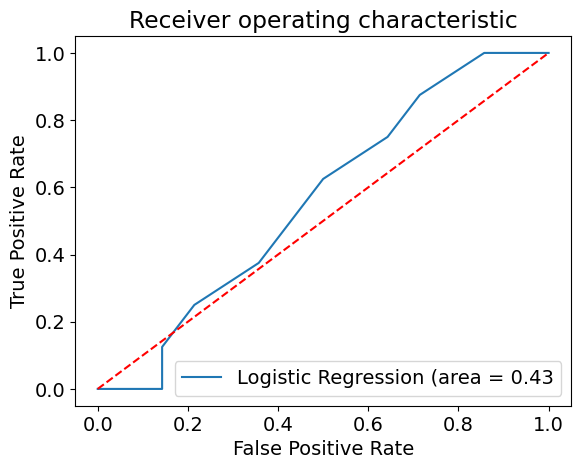

AUC值: 0.4285714285714286


In [ ]:
# ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, model_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model_logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {logit_roc_auc :.2f}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

auc = roc_auc_score(Y_test, y_pred)
print("AUC值:", auc)

In [ ]:
model_logreg.coef_[0][0]

0.31713617684724676

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


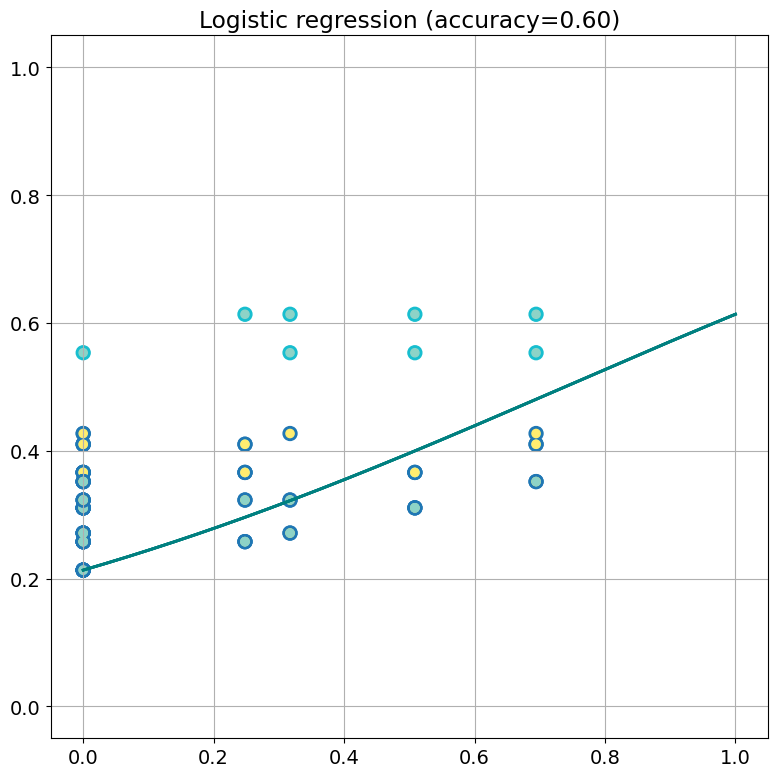

In [ ]:
from scipy.special import expit
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'Logistic regression (accuracy={0.6:.2f})')
# 訓練集範圍的邏輯斯函數
x = np.linspace(np.amin(X_train), np.amax(X_train),
                num=X_train.size)
y = expit(np.dot(x,  model_logreg.coef_[0]) + model_logreg.intercept_[0])

plt.plot(x, y, color='teal', linewidth=2,
         label=f'expit(x * {model_logreg.coef_[0][0]:.3f} ' + \
               f'+ {model_logreg.intercept_[0]:.3f})')

# 邏輯斯函數
y_t = expit(np.dot(X_test, model_logreg.coef_[0]) + model_logreg.intercept_[0])
# 測試集資料與其實際/預測標籤
plt.scatter(X_test['襄']*model_logreg.coef_[0][0], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['襄']*model_logreg.coef_[0][0], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['苡']*model_logreg.coef_[0][1], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['苡']*model_logreg.coef_[0][1], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['妲']*model_logreg.coef_[0][2], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['妲']*model_logreg.coef_[0][2], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['叡']*model_logreg.coef_[0][3], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['叡']*model_logreg.coef_[0][3], y_t, c=Y_test, cmap='Set3', s=35)

plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

#考慮到我們想要分析的是模型的係數，sklearn默認使用正則化回歸，會使得係數產生偏差，因此做了第二個版本。

#使用statsmodel.api建立logistic模型，並加以分析


In [ ]:
import statsmodels.api as sm

# 建立羅吉斯回歸模型
logit_model = sm.Logit(Y_train, X_train)

# 訓練模型
logit_result = logit_model.fit()

# 檢視模型摘要
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.675714
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   86
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                -0.02371
Time:                        12:34:13   Log-Likelihood:                -58.111
converged:                       True   LL-Null:                       -56.765
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
襄              0.0060      0.452      0.013      0.989      -0.879       0.891
苡              0.1066      0.

In [ ]:
Y_pred = logit_result.predict(X_test)
Y_pred_binary = (Y_pred >= 0.5).astype(int)

In [ ]:
Y_pred_binary = Y_pred_binary.values

In [ ]:
accuracy = (Y_pred_binary == Y_test).mean()
print("準確率：", accuracy)

準確率： 0.5


In [ ]:
params = logit_result.params
conf_ = logit_result.conf_int()
conf_['Odds Ratios'] = params
conf_.columns = ["5%","95%","Odds Ratios"]
print(np.exp(conf_))

         5%       95%  Odds Ratios
襄  0.415211  2.437390     1.005998
苡  0.499416  2.478266     1.112513
妲  0.281822  1.128624     0.563978
叡  0.466003  2.690148     1.119650


In [ ]:
logit_result_prob = np.asarray(logit_result.predict(X_test))

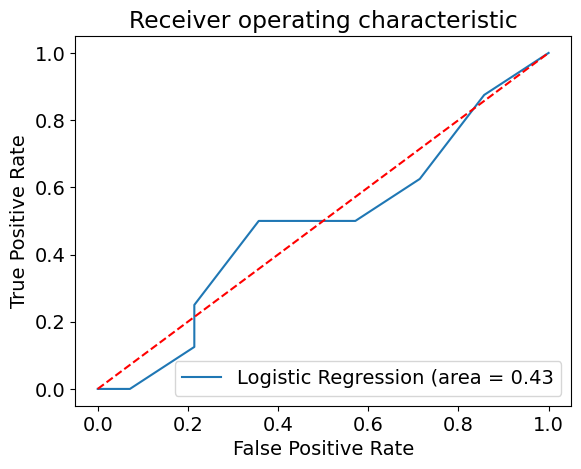

AUC值: 0.4285714285714286


In [ ]:
# ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, model_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logit_result_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {logit_roc_auc :.2f}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

auc = roc_auc_score(Y_test, y_pred)
print("AUC值:", auc)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


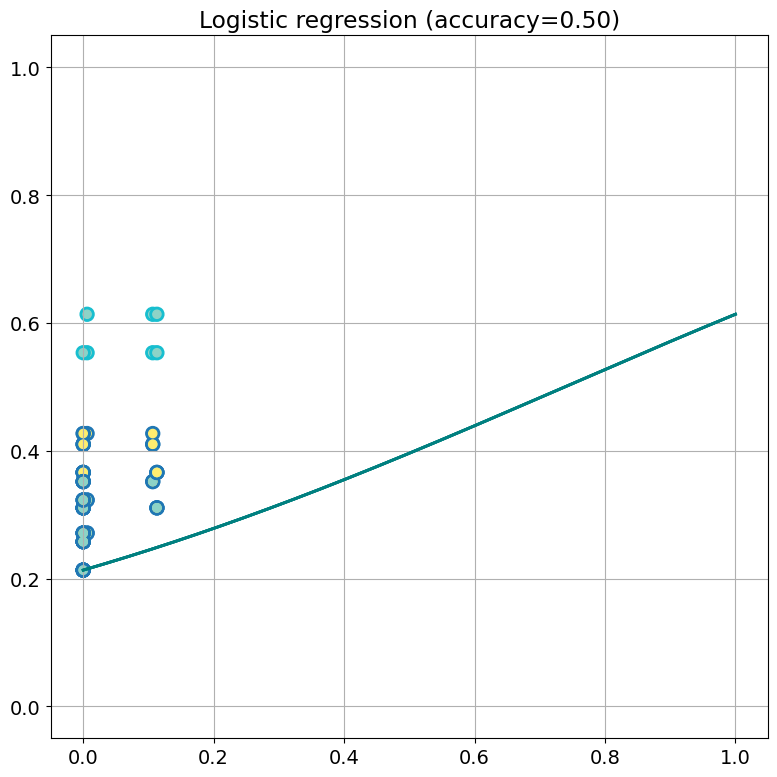

In [ ]:
# 繪圖
from scipy.special import expit
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'Logistic regression (accuracy={accuracy:.2f})')
# 訓練集範圍的邏輯斯函數
x = np.linspace(np.amin(X_train), np.amax(X_train),
                num=X_train.size)
y = expit(np.dot(x,  model_logreg.coef_[0]) + model_logreg.intercept_[0])

plt.plot(x, y, color='teal', linewidth=2,
         label=f'expit(x * {model_logreg.coef_[0][0]:.3f} ' + \
               f'+ {model_logreg.intercept_[0]:.3f})')

# 邏輯斯函數
y_t = expit(np.dot(X_test, model_logreg.coef_[0]) + model_logreg.intercept_[0])
# 測試集資料與其實際/預測標籤
plt.scatter(X_test['襄']*logit_result.params[0], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['襄']*logit_result.params[0], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['苡']*logit_result.params[1], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['苡']*logit_result.params[1], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['妲']*logit_result.params[2], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['妲']*logit_result.params[2], y_t, c=Y_test, cmap='Set3', s=35)
plt.scatter(X_test['叡']*logit_result.params[3], y_t, c=y_pred, cmap='tab10', s=100)
plt.scatter(X_test['叡']*logit_result.params[3], y_t, c=Y_test, cmap='Set3', s=35)

plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

#結果還是不太理想，因此考慮是否跟變數的選擇有關。